In [29]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('BBDD ONSV SINIESTROS 2021-2022.xlsx')

In [30]:
def calcular_gravedad(row):


    puntuacion_tipo_siniestro = {
        'CHOQUE': 3, 'DESPISTE': 3,
        'ATROPELLO': 2, 'ATROPELLO FUGA': 2, 'VOLCADURA': 2, 'INCENDIO': 2,
        'CHOQUE FUGA': 1, 'CHOQUE CON OBJETO FIJO': 1, 'CAÍDA DE PASAJERO': 1, 'ESPECIAL': 1, 'FERROVIARIO': 1
    }

    puntuacion_condicion_climatica = {
        'NUBLADO': 2, 'NIEBLA': 2, 'LLUVIOSO': 2,
        'DESPEJADO': 1, 'SOLEADO': 1,
        'GRANIZADO': 0
    }
    puntuacion_superficie_calzada = {
        'TROCHA': 2, 'CASCAJO/RIPIO': 2, 'ADOQUINADO': 2, 'EMPEDRADO': 2,
        'AFIRMADO': 1, 'CONCRETO': 1, 'ASFALTADA': 1
    }
    puntuacion_caracteristicas_via = {
        'INTERSECCIÓN': 2, 'CURVA': 2, 'ÓVALO': 2, 'PUENTE': 2, 'TÚNEL': 2, 'PASE A DESNIVEL': 2,
        'TRAMO RECTO': 1, 'SINUOSA': 1, 'OTRO': 1
    }


    score = 0
    score += puntuacion_tipo_siniestro.get(row['TIPO_SINIESTRO'], 0)
    score += puntuacion_condicion_climatica.get(row['CONDICION_CLIMATICATICA'], 0)
    score += puntuacion_superficie_calzada.get(row['SUPERFICIE_CALZADA'], 0)
    score += puntuacion_caracteristicas_via.get(row['CARACTERÍSTICAS_VIA'], 0)

    return score


data['Gravedad'] = data.apply(calcular_gravedad, axis=1)


data[['TIPO_SINIESTRO', 'CONDICION_CLIMATICATICA', 'SUPERFICIE_CALZADA', 'CARACTERÍSTICAS_VIA', 'Gravedad']].head()

,TIPO_SINIESTRO,CONDICION_CLIMATICATICA,SUPERFICIE_CALZADA,CARACTERÍSTICAS_VIA,Gravedad
0,CHOQUE,LLUVIOSO,CONCRETO,INTERSECCIÓN,8
1,DESPISTE,DESPEJADO,TROCHA,TRAMO RECTO,7
2,DESPISTE,DESPEJADO,ASFALTADA,TRAMO RECTO,6
3,ATROPELLO,DESPEJADO,ASFALTADA,TRAMO RECTO,5
4,ATROPELLO FUGA,DESPEJADO,ASFALTADA,TRAMO RECTO,5


In [ ]:
data.head()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


categorical_vars = ['TIPO_SINIESTRO', 'CONDICION_CLIMATICATICA', 'SUPERFICIE_CALZADA', 'CARACTERÍSTICAS_VIA', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'ZONA', 'TIPO_VIA', 'RED_VIAL', 'CICLOVIA', 'ZONIFICACION']
numerical_vars = ['HORA_SINIESTRO','CANTIDAD_HERIDOS']


data['HORA_SINIESTRO'] = pd.to_datetime(data['HORA_SINIESTRO'], format='%H:%M').dt.hour * 60 + pd.to_datetime(data['HORA_SINIESTRO'], format='%H:%M').dt.minute



preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_vars),
        ('cat', OneHotEncoder(), categorical_vars)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
data_prepared = pipeline.fit_transform(data)


X_train, X_test, y_train, y_test = train_test_split(
    data_prepared, data['Gravedad'], test_size=0.2, random_state=42
)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3884, 1186), (971, 1186), (3884,), (971,))


SVM Model Accuracy: 0.995880535530381
Confusion Matrix:
 [[ 37   0   0   0   0   0]
 [  0 243   0   1   0   0]
 [  0   0 396   0   1   0]
 [  0   0   0 207   2   0]
 [  0   0   0   0  62   0]
 [  0   0   0   0   0  22]]


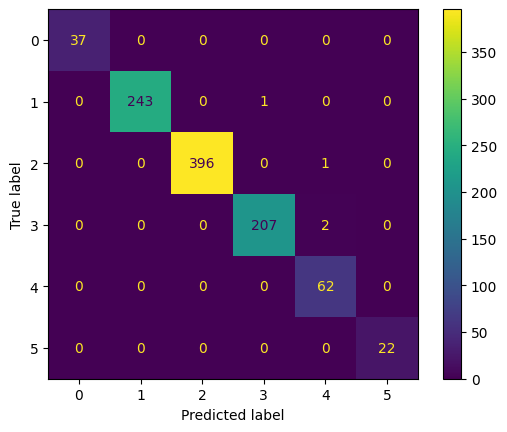

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC



svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)


accuracy_svm, conf_matrix_svm

print("\nSVM Model Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)


conf_matrix = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()



Random Forest Model Accuracy: 0.9309989701338826
Confusion Matrix:
 [[ 32   1   4   0   0   0]
 [  3 232   7   2   0   0]
 [  0  10 380   4   3   0]
 [  0   0  18 190   0   1]
 [  0   0   0  12  50   0]
 [  0   0   0   1   1  20]]


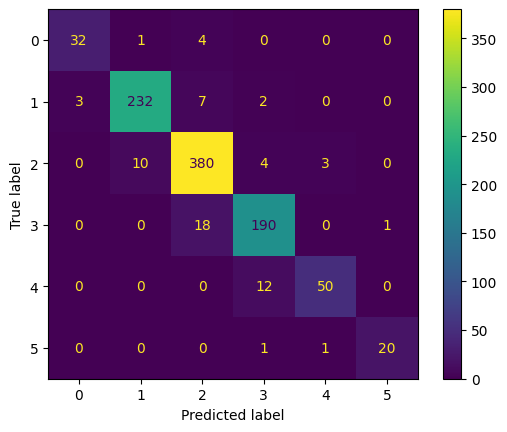

In [33]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


accuracy_rf, conf_matrix_svm


print("Random Forest Model Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)


cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm_rf)
disp.plot()
plt.show()


Gradient Boosting Model Accuracy: 0.952626158599382
Confusion Matrix:
 [[ 36   1   0   0   0   0]
 [  2 237   5   0   0   0]
 [  0   7 382   5   3   0]
 [  0   0   7 196   4   2]
 [  0   0   0   8  54   0]
 [  0   0   0   0   2  20]]


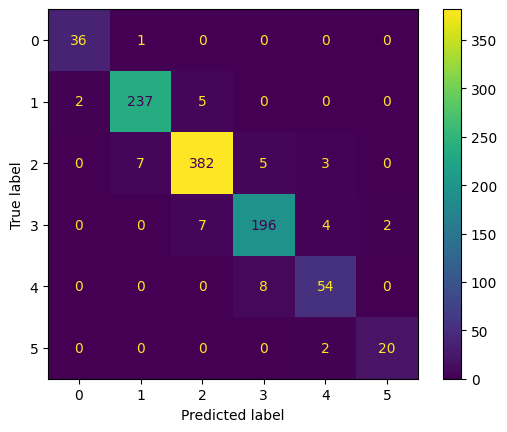

In [34]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)


accuracy_gb, conf_matrix_svm

print("\nGradient Boosting Model Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)


cm_gb = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(cm_gb)
disp.plot()
plt.show()

In [35]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


models = {
    'SVCr': SVC(kernel='linear', random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
}


X = data_prepared
y = data['Gravedad']


for name, model in models.items():
    cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Resultados para {name}:")
    print("  - Media de exactitud:", cross_val_scores.mean())
    print("  - Desviación estándar de exactitud:", cross_val_scores.std())
    print("  - Puntuaciones de validación cruzada:", cross_val_scores)
    print("\n")

Resultados para SVCr:
  - Media de exactitud: 0.9964984552008239
  - Desviación estándar de exactitud: 0.002120624127906706
  - Puntuaciones de validación cruzada: [0.9969104  0.99588054 0.99897013 0.99279094 0.99794027]


Resultados para RandomForestClassifier:
  - Media de exactitud: 0.9274974253347065
  - Desviación estándar de exactitud: 0.016252318471331715
  - Puntuaciones de validación cruzada: [0.91452111 0.92173018 0.9423275  0.90834192 0.95056643]


Resultados para GradientBoostingClassifier:
  - Media de exactitud: 0.9462409886714728
  - Desviación estándar de exactitud: 0.010945689191008393
  - Puntuaciones de validación cruzada: [0.94747683 0.93820803 0.95674562 0.9299691  0.95880536]




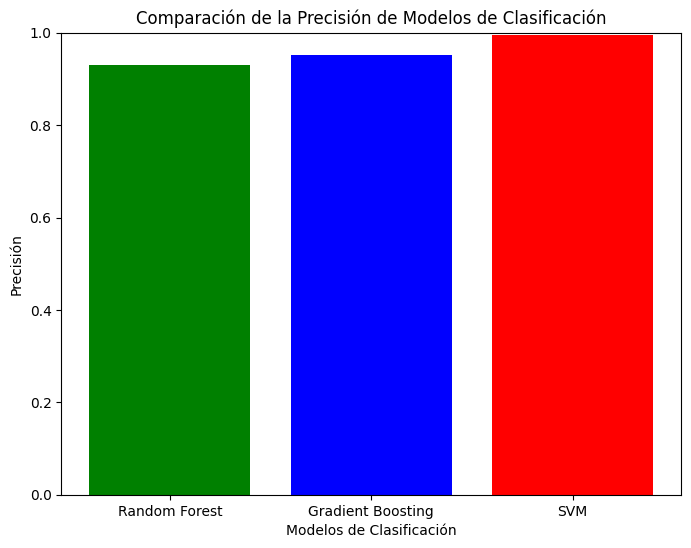

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


model_names = ['Random Forest', 'Gradient Boosting', 'SVM']


accuracies = [accuracy_rf, accuracy_gb, accuracy_svm]


plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['green', 'blue', 'red'])
plt.xlabel('Modelos de Clasificación')
plt.ylabel('Precisión')
plt.title('Comparación de la Precisión de Modelos de Clasificación')
plt.ylim([0, 1])
plt.show()

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


categorical_features = [
    'TIPO_SINIESTRO', 'CONDICION_CLIMATICATICA', 'CARACTERÍSTICAS_VIA', 'SUPERFICIE_CALZADA', 'Gravedad','DEPARTAMENTO', 'ZONA'
]


categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])


clustering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False))
])


data_prepared = clustering_pipeline.fit_transform(data)

data_prepared.shape, data_prepared.dtype

((4855, 66), dtype('float64'))

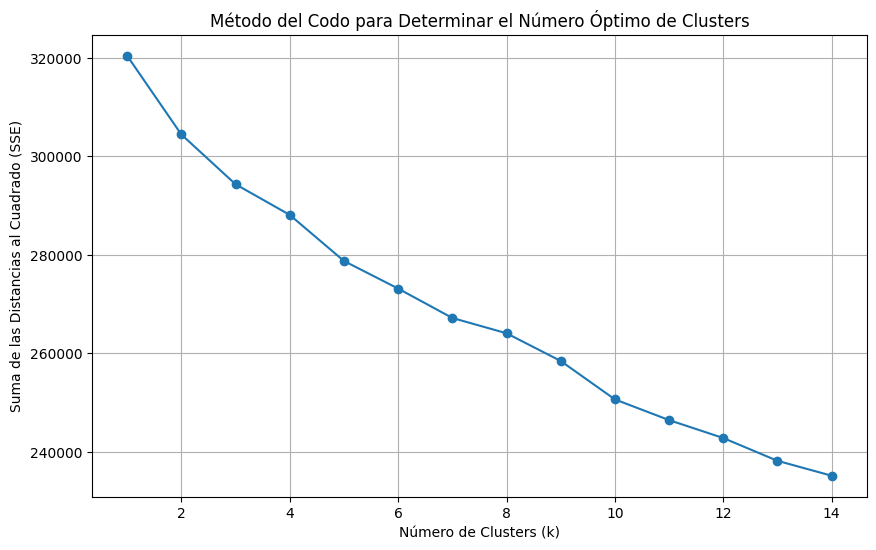

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k_values = range(1, 15)
sse = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_prepared)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de las Distancias al Cuadrado (SSE)')
plt.grid(True)
plt.show()


In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(data_prepared)


data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters



cluster_summary = data_with_clusters.groupby('Cluster').agg({
    'Gravedad': pd.Series.mode,
    'SUPERFICIE_CALZADA': pd.Series.mode,
    'ZONA': pd.Series.mode,
})

cluster_summary


,Gravedad,SUPERFICIE_CALZADA,ZONA
Cluster,,,
0,7,ASFALTADA,URBANA
1,4,ASFALTADA,RURAL
2,7,"[AFIRMADO, ASFALTADA]",RURAL
3,6,ASFALTADA,RURAL
4,5,ASFALTADA,URBANA
5,9,TROCHA,RURAL


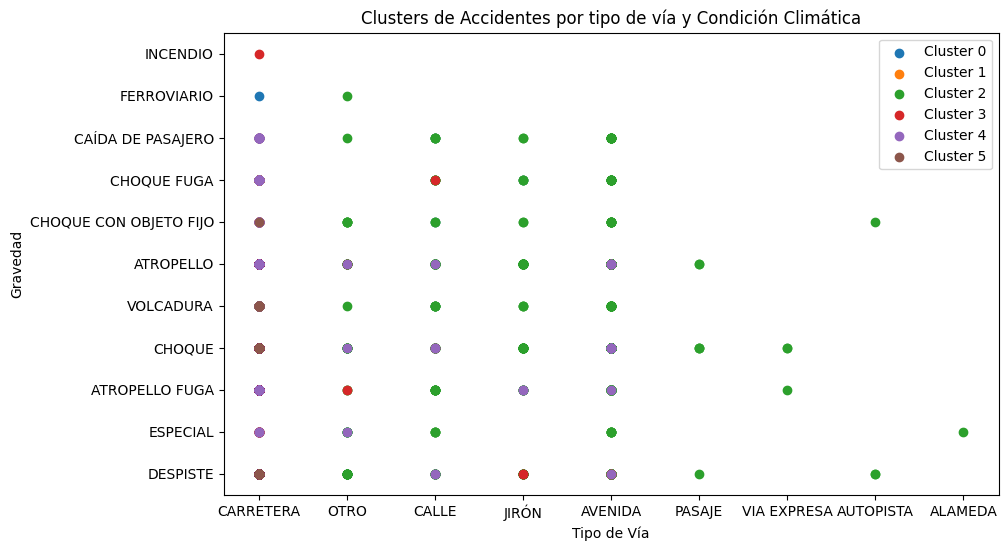

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


clusters = kmeans.fit_predict(data_prepared)


data['Cluster'] = clusters


plt.figure(figsize=(10, 6))

for i in range(kmeans.n_clusters):
    plt.scatter(data.loc[data['Cluster'] == i, 'TIPO_VIA'], data.loc[data['Cluster'] == i, 'TIPO_SINIESTRO'], label=f'Cluster {i}')
plt.title('Clusters de Accidentes por tipo de vía y Condición Climática')
plt.xlabel('Tipo de Vía')
plt.ylabel('Gravedad')
plt.legend()
plt.show()